___
<h1> Machine Learning </h1>
<h2> M. Sc. in Electrical and Computer Engineering </h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)
___

# $k$-Nearest Neighbors (kNN): Regression

In [1]:
from sklearn.model_selection import train_test_split
# !pip3 install mglearn

import matplotlib.pyplot as plt
#import mglearn.plots

from sklearn.neighbors import KNeighborsRegressor
import numpy as np

np.random.seed(1)

## k-Neighbors Regression

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s start by using a single nearest neighbor, this time using the wave dataset. 

The prediction using a single neighbor (1-NN) is just the target value of the nearest neighbor. When using multiple nearest neighbors for regression, the prediction is the average (or mean) of the relevant neighbors

In [2]:
np.random.seed(2)

n_samples = 50
a, b = -10, 10

# set of "x's"
timeline = np.linspace(a, b, n_samples).reshape(-1, 1)

# set a 'wave'
def make_wave(timeline):
    return 10 * np.cos(timeline) + 5 * np.random.rand(len(timeline))

wave = make_wave(timeline.T[0])

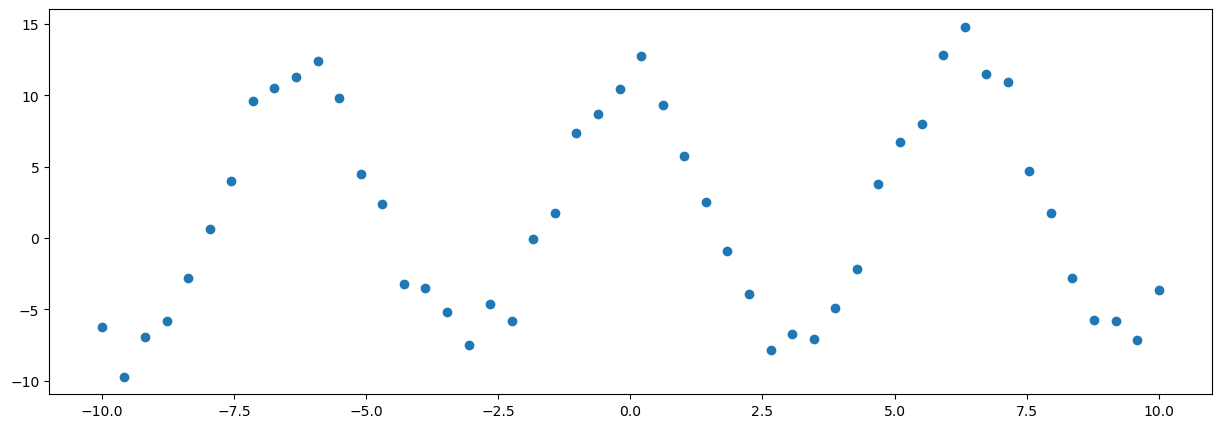

In [3]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(timeline, wave, linestyle='None', marker='o')
plt.show()

As usual, split the test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(timeline, wave, test_size=.1 )

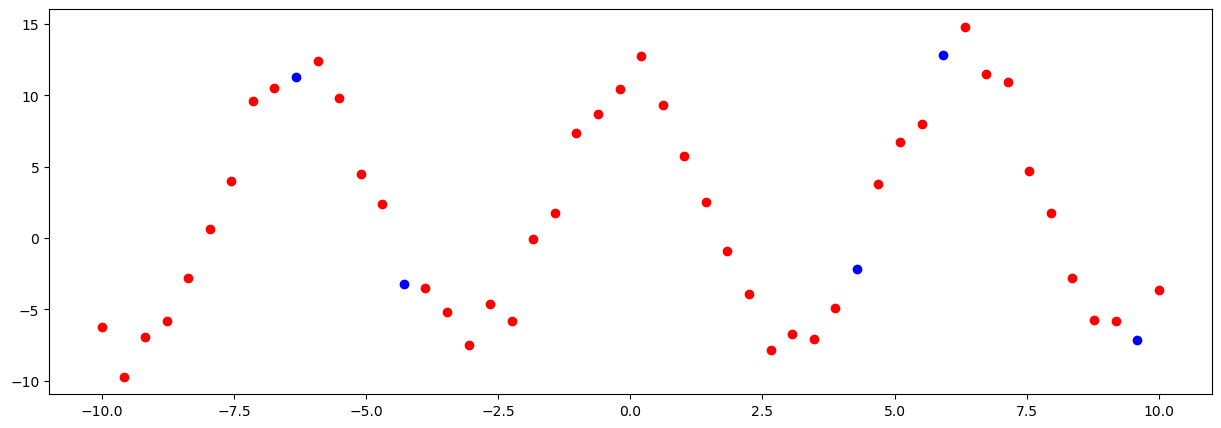

In [5]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
ax.plot(x_test, y_test, linestyle="none", marker='o', c="blue")
plt.show()

and then train the model

In [6]:
knr = KNeighborsRegressor(
        n_neighbors=3, 
        weights='distance').fit(x_train, y_train)

And now the predictions

In [7]:
print(x_test)
print(y_test)
print(knr.predict(x_test))

[[ 5.91836735]
 [ 4.28571429]
 [-6.32653061]
 [-4.28571429]
 [ 9.59183673]]
[12.84564898 -2.20399589 11.32474377 -3.21625982 -7.1827602 ]
[11.41285906  0.89869281 11.10213475  0.45334676 -4.93628885]


And we can see compute the errors

In [8]:
y_pred = knr.predict(x_test)

delta = y_pred - y_test
delta

array([-1.43278992,  3.1026887 , -0.22260902,  3.66960658,  2.24647134])

And the score (coefficient of determination $R^2$ of the prediction) is

In [9]:
knr.score(x_test, y_test)

0.9092639026125272

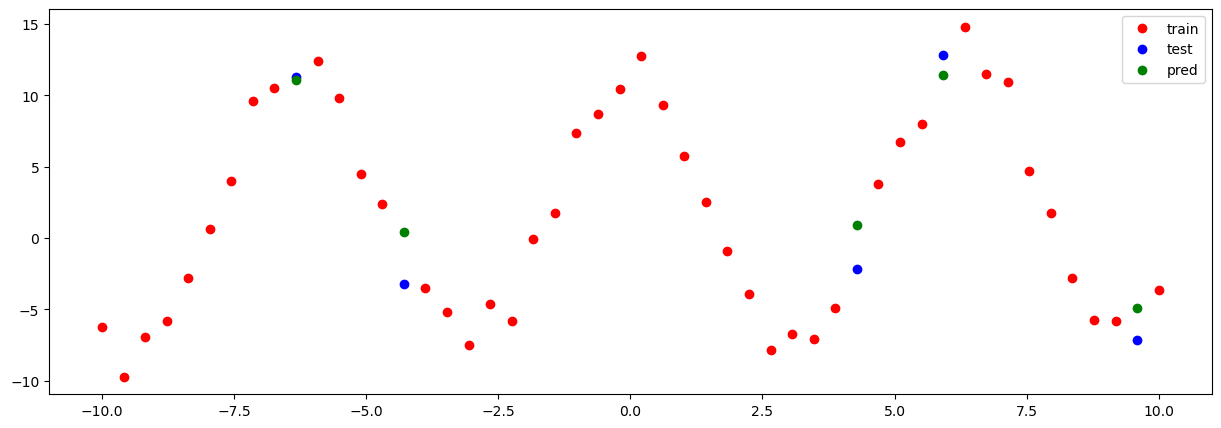

In [10]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
ax.plot(x_test, y_test, linestyle="none", marker='o', c="blue")
ax.plot(x_test, y_pred, linestyle="none", marker='o', c="green")
ax.legend(["train", "test", "pred"])
plt.show()

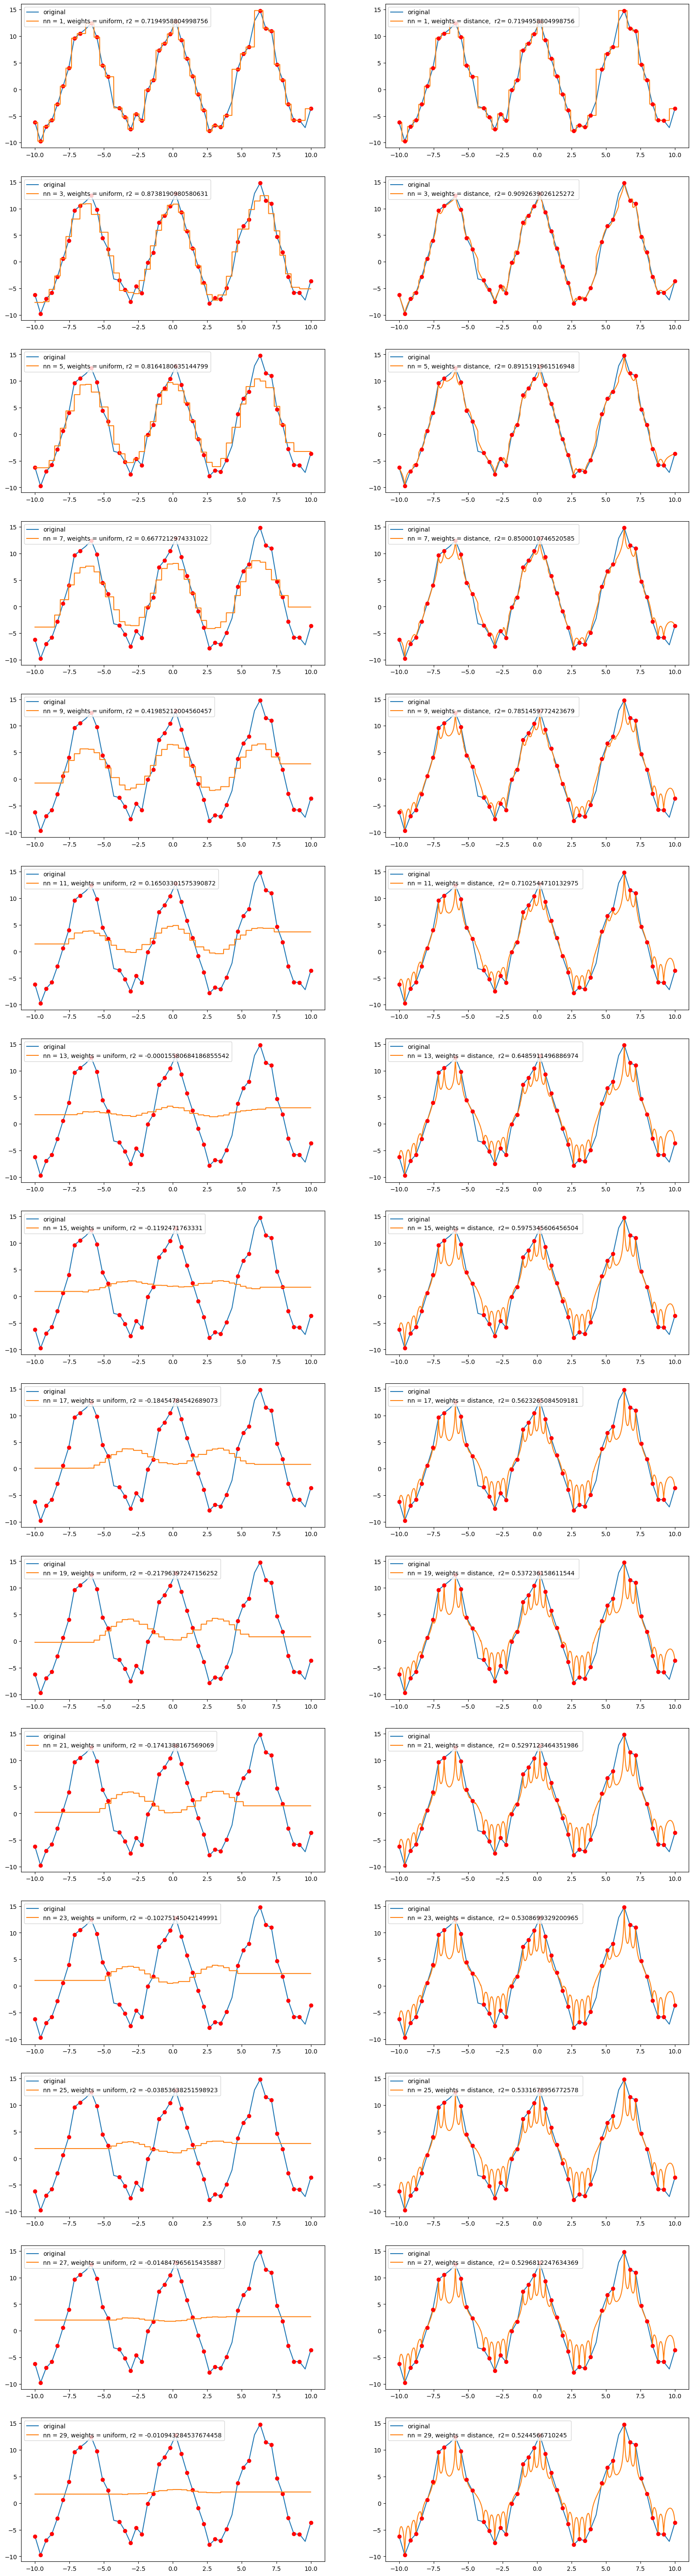

In [11]:
X = np.arange(a, b, .01).reshape(-1, 1)

K = 30
fig = plt.figure(figsize=(10 * 2, 5 * K))

im_idx = 0

for nn in range(1, K, 2):
    #  weights='uniform'
    # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='uniform').fit(x_train, y_train)
    y = knr.predict(X)

    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    ax.plot(timeline, wave, label='original')
    ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
    ax.plot(X, y, label=f'nn = {nn}, weights = uniform, r2 = {knr.score(x_test, y_test)}')
    ax.legend()

    # weights='distance'
    # ‘distance’ : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='distance').fit(x_train, y_train)
    y = knr.predict(X)
    
    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    ax.plot(timeline, wave, label='original')
    ax.plot(X, y, label=f'nn = {nn}, weights = distance,  r2= {knr.score(x_test, y_test)} ')
    ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
    ax.legend()
    
plt.show()

Let us see how it behaves outside the samples

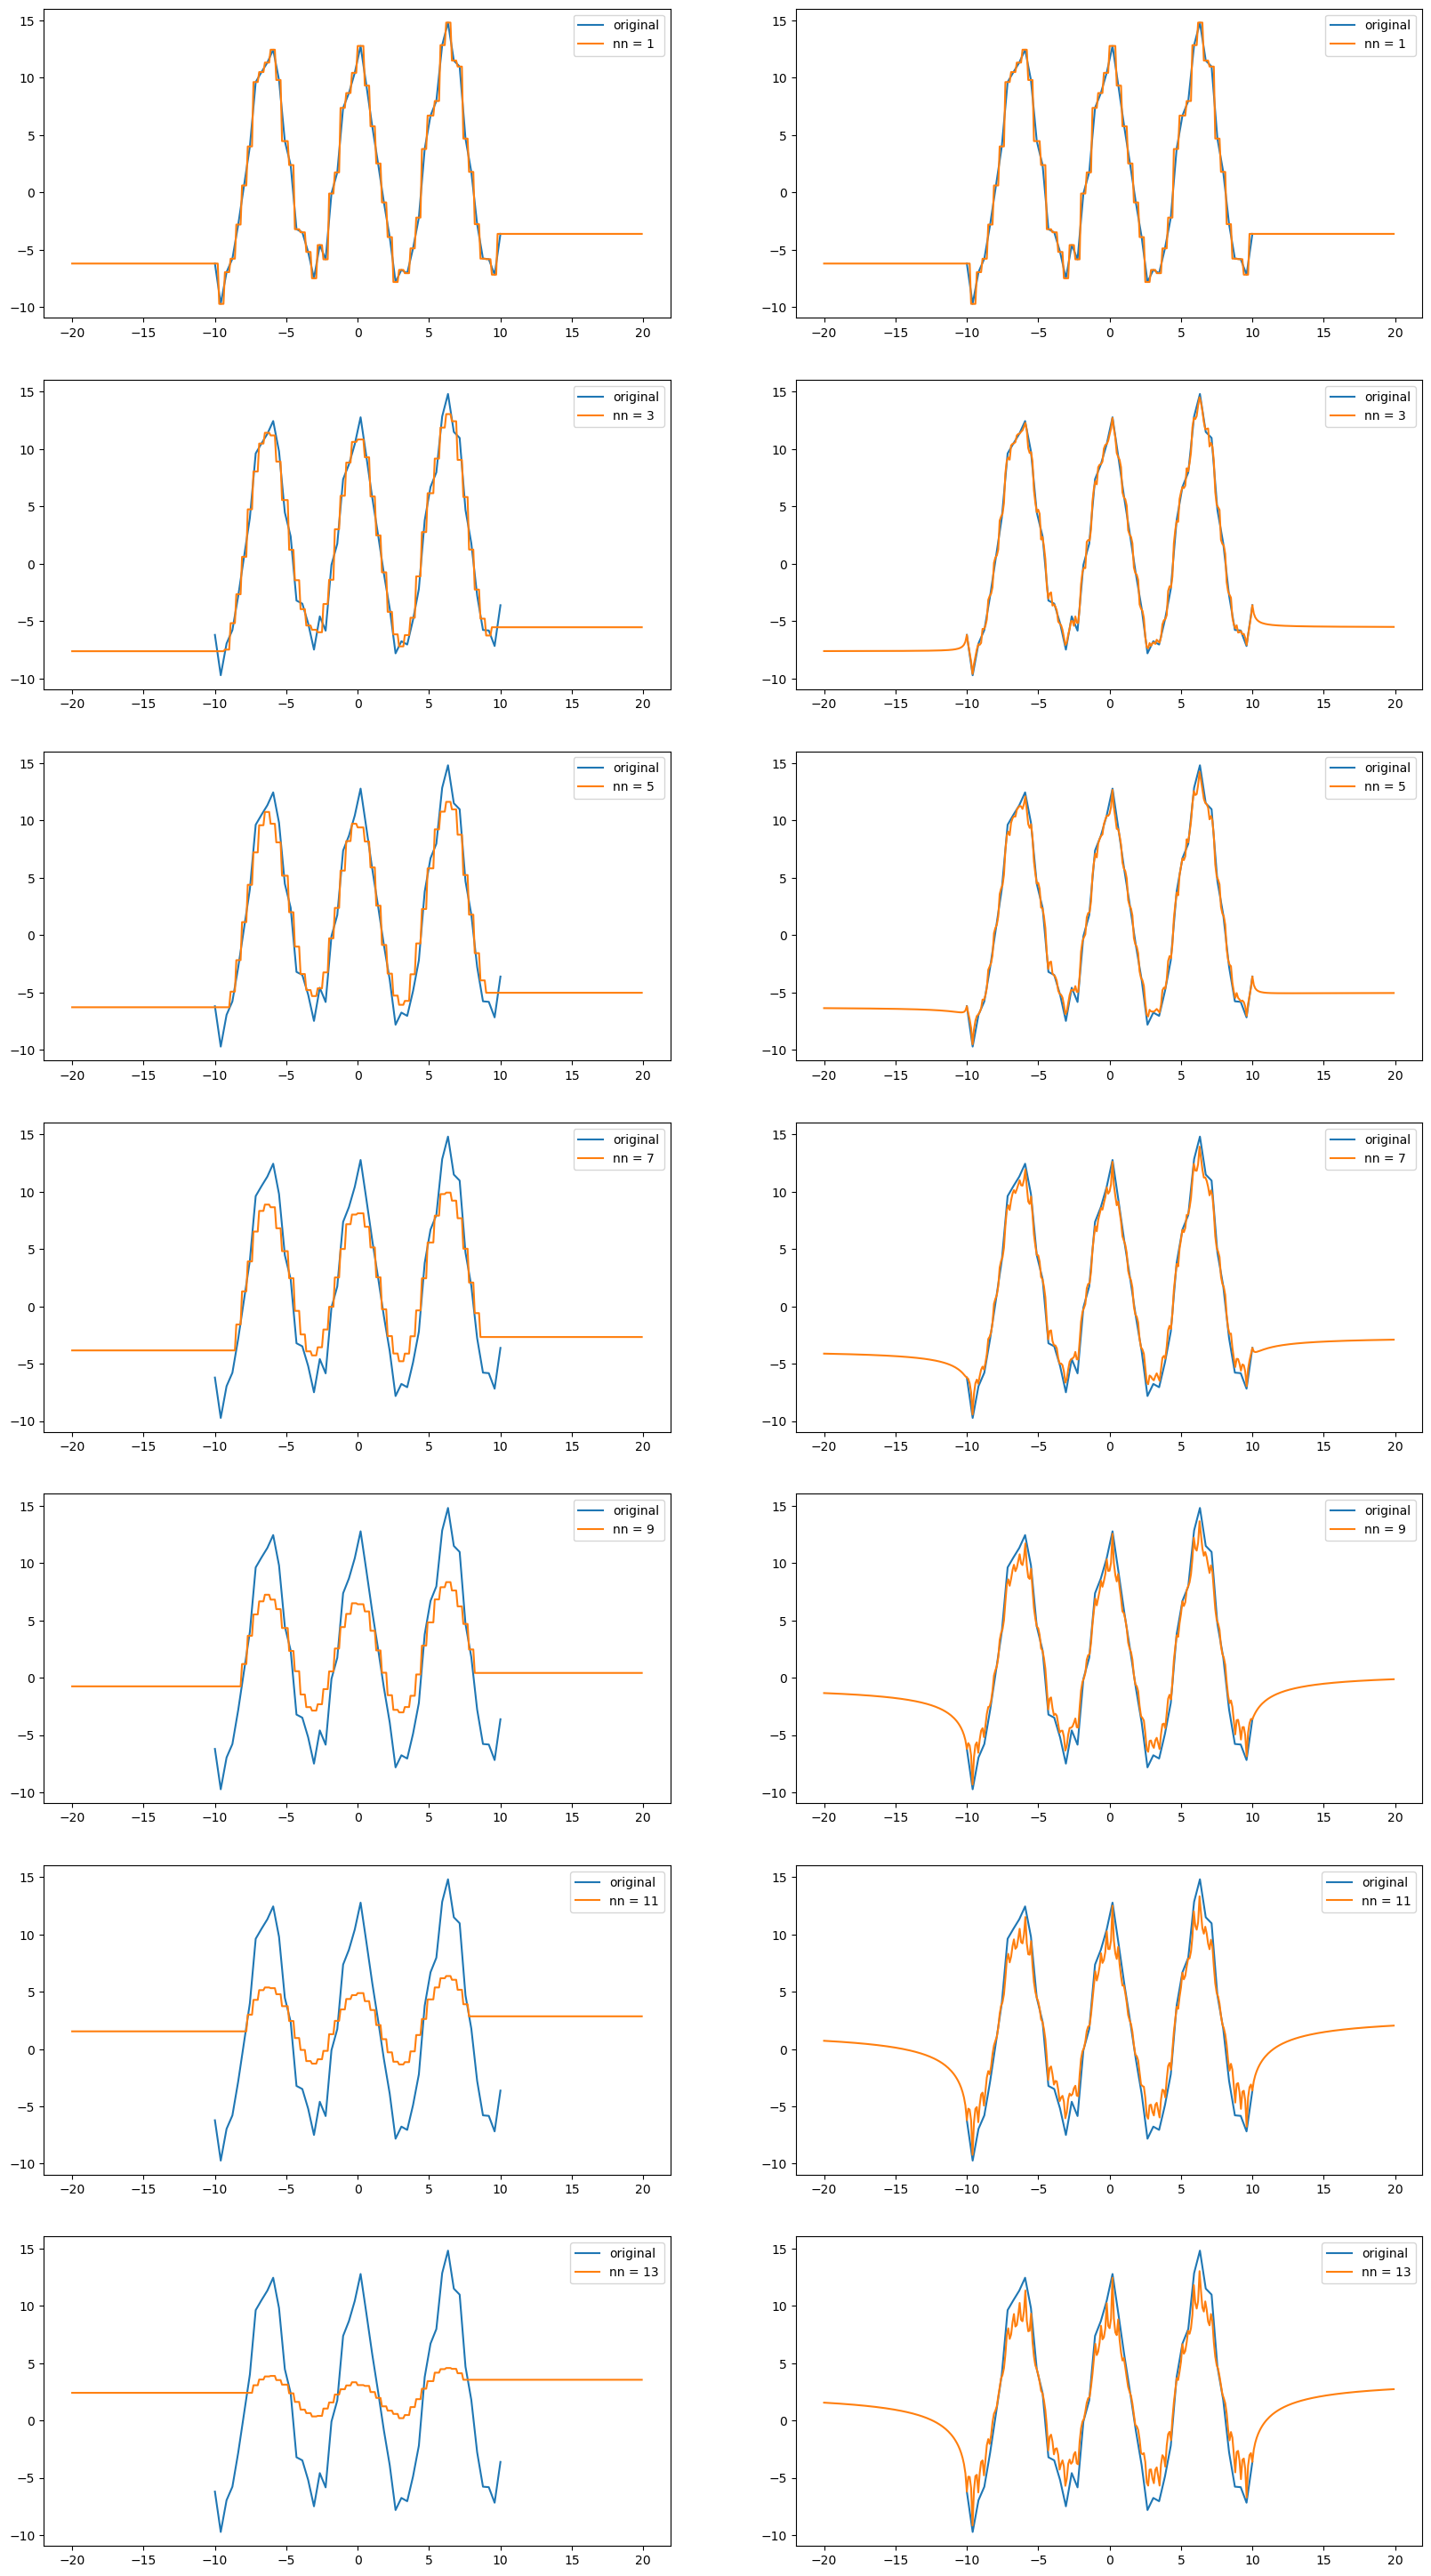

In [12]:
# supposing a<0
X = np.arange(2 * a, 2 * b, .1).reshape(-1, 1)

K = 15
fig = plt.figure(figsize=(10 * 2, 5 * K))

im_idx = 0

for nn in range(1, K, 2):
    #  weights='uniform'
    # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='uniform').fit(timeline, wave)
    y = knr.predict(X)

    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    ax.plot(timeline, wave, label='original')
    ax.plot(X, y, label='nn = {}'.format(nn))
    ax.legend()

    # weights='distance'
    # ‘distance’ : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='distance').fit(timeline, wave)
    y = knr.predict(X)
    
    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    ax.plot(timeline, wave, label='original')
    ax.plot(X, y, label='nn = {}'.format(nn))
    ax.legend()
    
plt.show()